Jupiter Notebook: Visualize Vulnerability (Vulnerability assessment based on the convolution of fragility and consequence models)

Prepared by: Fatemeh Jalayer, Hossein Ebrahimian

Uses data from: Empirical Tsunami Risk Products Dataset (ETRiS v0, https://eurotsunamirisk.org/)

This Notebook describes how the vulnerability data available in EPOS-ICS-C portal under the layer entitled "Empirical Tsunami Risk Products Dataset (ETRiS v0)" can be visualized and interpreted. 
The vulnerability curves presented here are derived through vulnerability assessment based on the convolution of fragility and consequence models.

The dataset provides risk products derived from observed data collected during past tsunami events. These risk products include tsunami fragility and vulnerability curves, which are essential components for tsunami risk assessment. The underlying observed data, which are not directly visualized in this layer, contain information on tsunami effects (e.g., tsunami height, flow depth) and tsunami consequences (e.g., casualties, building damage).

The vulnerability curves derived through convolution provide the 16th, median, and 84th percentile estimates of the loss ratio. They also include an estimate of epistemic uncertainty, expressed in terms of the uncertainty in the median curve. This uncertainty is directly related to the number of data points used for deriving the fragility curve (which is part of the convolution process).
Further details of the derivation are provided in Jalayer et al. (2025).

The procedure for visualizing a vulnerability curve is described below.

1- Reading the input from CSV file on GitHub.
The input vulnerability data can be accessed directly from the GitHub repository:
https://github.com/eurotsunamirisk/etris_data_and_data_products/tree/main/etris_data_products/Vulnerability_Curves

As an example, consider the vulnerability curve derived from the 2011 Great East Japan Tsunami data (Suppasri et al., 2013) for Model 3. The corresponding CSV file is available at:
https://github.com/eurotsunamirisk/etris_data_and_data_products/blob/main/etris_data_products/Vulnerability_Curves/Japan%202011_RC%2C%203%20storey%20and%20more_M3.csv

(Note that three vulnerability models are available: Model 1, Model 2, and Model 3).
(Also note that this CSV file represents an earlier version and will be soon updated by the new version)

You can repeat this process for all three vulnerability models by simply changing the model number in the file name.
Each vulnerability model corresponds to a different link function, as described below:

Model 1- Logistic link function: (1+exp(ax+b))^-1

Model 2- Probit link function: F(ax+b), where F is the standard Gaussian CDF. 

Model 3- cloglog link function: 1-exp(-exp(ax+b))

For detailed information on these fragility models, please see the following article:

Jalayer, F., Ebrahimian, H., Trevlopoulos, K., Bradley, B. (2023). Empirical tsunami fragility modelling for hierarchical damage levels. Natural Hazards and Earth System Sciences, 23(2), 909-931. https://nhess.copernicus.org/articles/23/909/2023/

For additional information on vulnerability modelling and the convolution approach, see:
Fatemeh Jalayer, Hossein Ebrahimian. and the ETRiS Team,  Empirical Tsunami Vulnerability Modelling  (to be submitted to NHESS)

Note: Before running the Python code, the following libraries should be installed:
pandas, plotly, numpy, scipy, math.
You can install all required dependencies using the requirements.txt file:

pip install -r requirements.txt

In [17]:
# Initial Libraries

import pandas as pd
import plotly.graph_objects as ply
import numpy as np
import scipy.stats as ss
import math

In [19]:
# Read CSV file

allData = pd.read_csv('Japan 2011_Wood, 3 storey and more_M3_vulnerability_Model 3_wo_uncertainty.csv')
intensityType = allData.columns[0];
IM = allData[intensityType]
RF_minus1sigma = allData['16th percentile vulnerability']
RF = allData['median vulnerability']
RF_plus1sigma = allData['84th percentile vulnerability']
beta = allData['logarithmic standard deviation']
betaE = allData['epistemic Uncertainty in the median']

# Show the CSV file
allData

,flow depth [m],16th percentile vulnerability,median vulnerability,84th percentile vulnerability,logarithmic standard deviation,epistemic Uncertainty in the median
0,0.000001,0.026305,0.030578,0.035546,0.150538,0.017697
1,0.010000,0.024503,0.048118,0.094492,0.674852,0.108422
2,0.020000,0.026046,0.054890,0.115675,0.745452,0.111997
3,0.030000,0.027429,0.060263,0.132401,0.787122,0.112145
4,0.040000,0.028715,0.064934,0.146838,0.815958,0.111165
...,...,...,...,...,...,...
1996,19.960000,0.882258,0.970582,1.000000,0.095411,0.005683
1997,19.970000,0.882300,0.970586,1.000000,0.095368,0.005682
1998,19.980000,0.882342,0.970591,1.000000,0.095325,0.005682
1999,19.990000,0.882384,0.970595,1.000000,0.095281,0.005681


(2) Plotting the vulnerability curve. The vulnerability curve depicts 16th, 50th (median), 84th percentiles of the loss ratio (a normalised loss metric used for depicting econonomic losses as a proportopn of the cost of replacement of the building). We also depict the epistemic uncertainties as the uncertainty in the median loss curve. 

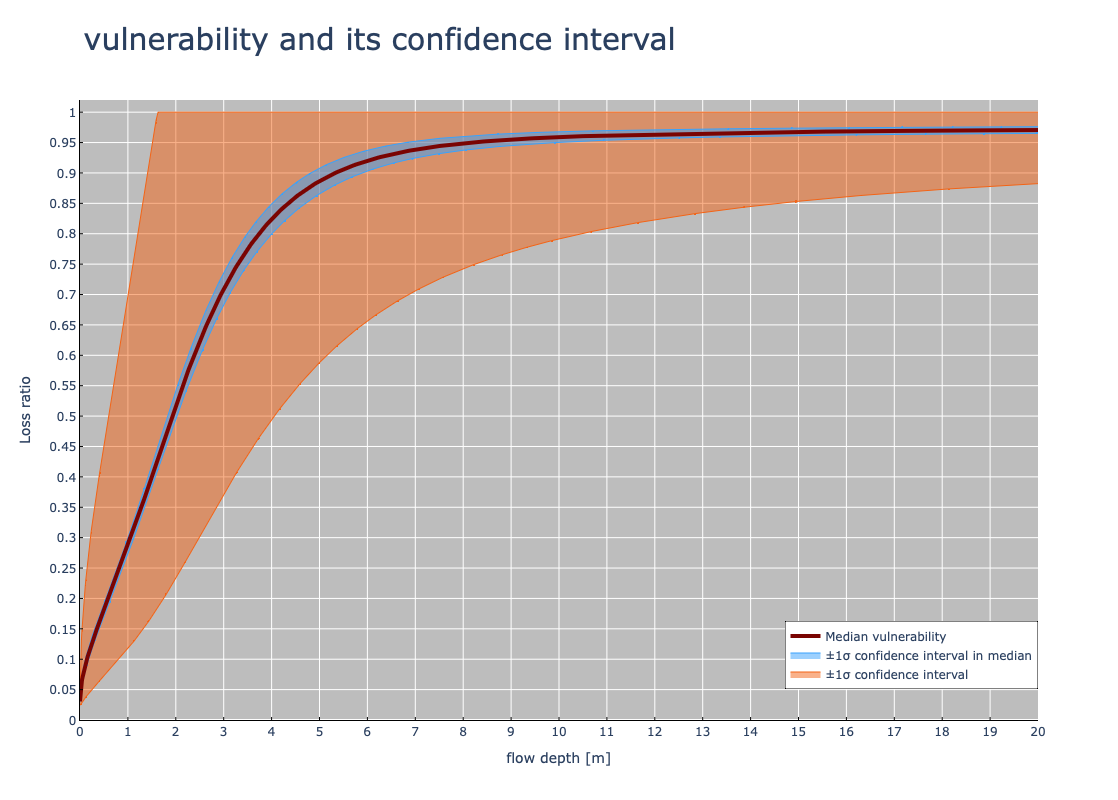

In [21]:
# Plot the vulnerability curve

RFp = np.multiply(RF,np.exp(betaE))
RFm = np.multiply(RF,np.exp(-betaE))

fig = ply.Figure()
fig.add_scatter(x=IM,y=RF_minus1sigma,mode='lines',line=dict(color='#f36315',width=1.0),showlegend=False)
fig.add_scatter(x=IM,y=RF_plus1sigma,mode='lines',line=dict(color='#f36315',width=1.0),fill='tonexty',name=('±1\u03C3 confidence interval'))

fig.add_scatter(x=IM,y=RFp,mode='lines',line=dict(color='#39a2fc',width=1.0),opacity=0.5,showlegend=False)
fig.add_scatter(x=IM,y=RFm,mode='lines',line=dict(color='#39a2fc',width=1.0),opacity=0.5,fill='tonexty',name=('±1\u03C3 confidence interval in median'))

fig.add_scatter(x=IM,y=RF,mode='lines',line=dict(color='#7a0402',width=4),name='Median vulnerability')

fig.update_xaxes(showline=True,linecolor='black',title=intensityType, tickmode = 'linear',tick0 = 0.0,dtick = 1,ticklen=3, tickcolor='black',ticks="inside",showgrid=True)
fig.update_yaxes(showline=True,linecolor='black',title='Loss ratio', tickmode = 'linear',tick0 = 0.0,dtick = 0.05,ticklen=3, tickcolor='black',ticks="inside",showgrid=True)

#bgColor = 'lightgray'
bgColor = 'rgb(189,189,189)'

fig.update_layout(width=1000,height=800,plot_bgcolor=bgColor,legend=dict(bordercolor='black',borderwidth=0.5,x=1,y=0.05,xanchor='right',yanchor='bottom'),title =dict(text='vulnerability and its confidence interval',x=0.075,font=dict(size=30)),)

fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(range=[0,1.02])

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

(4) Read from the 16th, 50th, 84th percentiles and the espitemic uncertainty for a given value of flow-depth from the vulnerability curves.

In [23]:
# Estimating the 16th and 84th Loss Ratio Curves

flowDepth = 1.5

etaLoss = np.interp(flowDepth,IM,RF)
loss16 = np.interp(flowDepth,IM,RF_minus1sigma)
loss84 = np.interp(flowDepth,IM,RF_plus1sigma)
betaLoss = np.interp(flowDepth,IM,beta)
betaLossMedian = np.interp(flowDepth,IM,betaE)

if loss84>1.0:
    print('84th percentile Loss value cannot be defined on plot as it is greater than 1.0')
   

(6) This value is visulaized below as the width of the confidence band (already plotted) at median:

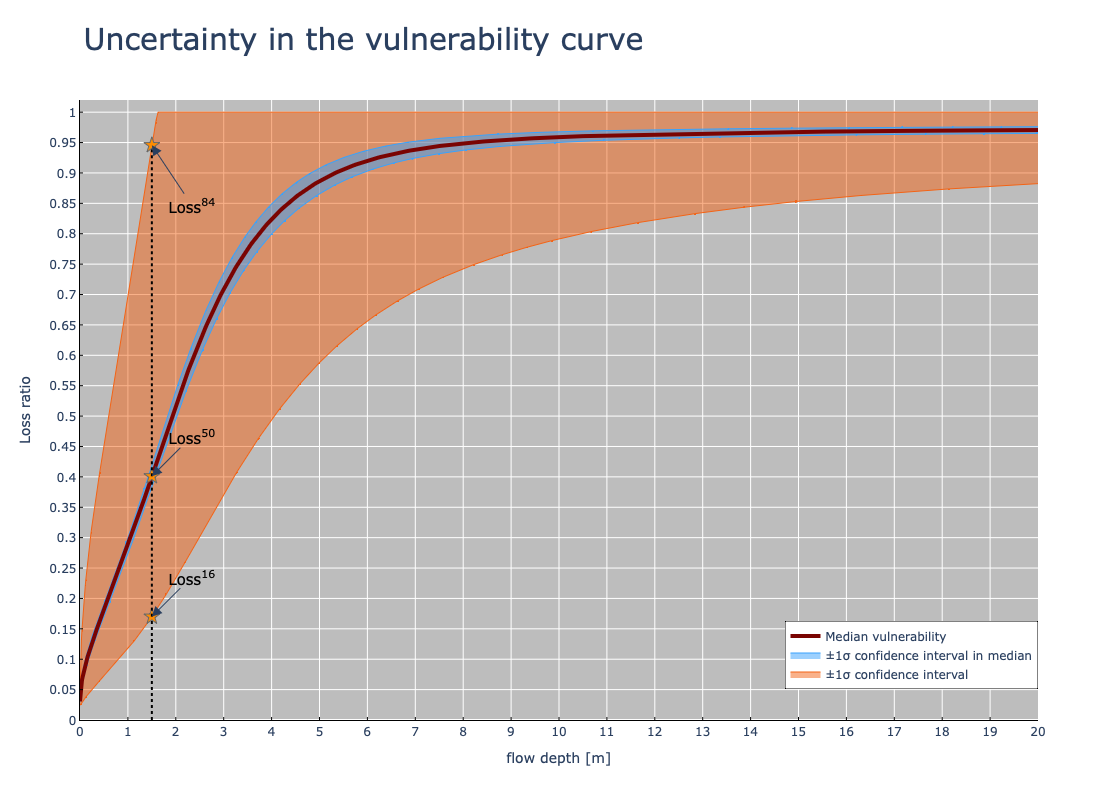

In [25]:
# Show the 16th and 84th Loss Ratio Curves

fig.add_scatter(x=[flowDepth,flowDepth],y=[0,loss16],mode='lines',line=dict(color='black',width=2.0,dash='dot'),showlegend=False)
fig.add_scatter(x=[flowDepth],y=[loss16],mode='markers',
                marker=dict(size=12,color='darkorange',symbol="star",
                            line=dict(color='dimgrey',width=1)),name='Loss<sup>16</sup>',showlegend=False)

fig.add_scatter(x=[flowDepth,flowDepth],y=[loss16,etaLoss],mode='lines',line=dict(color='black',width=2.0,dash='dot'),showlegend=False)
fig.add_scatter(x=[flowDepth],y=[etaLoss],mode='markers',
                marker=dict(size=12,color='darkorange',symbol="star",
                            line=dict(color='dimgrey',width=1)),name='Loss<sup>50</sup>',showlegend=False)

if loss84<=1.0:
    fig.add_scatter(x=[flowDepth,flowDepth],y=[etaLoss,loss84],mode='lines',line=dict(color='black',width=2.0,dash='dot'),showlegend=False)
    fig.add_scatter(x=[flowDepth],y=[loss84],mode='markers',
                marker=dict(size=12,color='darkorange',symbol="star",
                            line=dict(color='dimgrey',width=1)),name='Loss<sup>84</sup>',showlegend=False)

    fig.add_annotation(text='Loss<sup>84</sup>', font=dict(color='black',size=15),ax=40,ay=60,
                       x=flowDepth,y=loss84,
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='right')

fig.add_annotation(text='Loss<sup>16</sup>', font=dict(color='black',size=15),ax=40,ay=-40,
                       x=flowDepth,y=loss16,
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='right')

fig.add_annotation(text='Loss<sup>50</sup>', font=dict(color='black',size=15),ax=40,ay=-40,
                       x=flowDepth,y=etaLoss,
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='right')

fig.update_layout(title =dict(text='Uncertainty in the vulnerability curve',x=0.075,font=dict(size=30)),)

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

Below, we can see a print of the vulnerability curve median (in meters), the logarithmic standard deviation (without units) and an estimate of the epistemic uncertainty in the vulnerability curve (without units).

In [27]:
print('median at flow depth '+str(flowDepth)+'m =', etaLoss)
print('logarithmic standard deviation at flow depth '+str(flowDepth)+'m =', betaLoss)
print('Epistemic uncertainty at flow depth '+str(flowDepth)+'m =', betaLossMedian)


median at flow depth 1.5m = 0.400976212020186
logarithmic standard deviation at flow depth 1.5m = 0.857968853741748
Epistemic uncertainty at flow depth 1.5m = 0.0451363158977707
